In [1]:
import pandas as pd

dataset=pd.read_csv('cinnamon1.csv').values

data=dataset[:,1:6]
target=dataset[:,6].reshape(-1,1)

In [4]:
data[0]

array([1, 1, 1, 1, 1], dtype=int64)

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler_x=MinMaxScaler(feature_range=(0,1))
data_new=scaler_x.fit_transform(data)

scaler_y=MinMaxScaler(feature_range=(0,1))
target_new=scaler_y.fit_transform(target)

D:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
import joblib

joblib.dump(scaler_x,'scaler_x.pkl')
joblib.dump(scaler_y,'scaler_y.pkl')

['scaler_y.pkl']

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data_new,target_new,test_size=0.1)

In [9]:
from keras.layers import Dense,Dropout #densly connected layers
from keras.models import Sequential

model=Sequential() #model is an empty NN
#1st hidden layer (dense type-fully connected)
model.add(Dense(64,input_dim=5,activation='relu'))
model.add(Dropout(0.5))
#2nd Hidden layer
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu',kernel_initializer='normal'))
#final layer
model.add(Dense(1,input_dim=10,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [10]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=1000,validation_split=0.2,callbacks=[checkpoint])

Train on 3654 samples, validate on 914 samples
Epoch 1/1000
3654/3654 [==============================] - 0s 92us/step - loss: 0.0837 - val_loss: 0.0510
Epoch 2/1000
3654/3654 [==============================] - 0s 45us/step - loss: 0.0609 - val_loss: 0.0430
Epoch 3/1000
3654/3654 [==============================] - 0s 47us/step - loss: 0.0538 - val_loss: 0.0394
Epoch 4/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0515 - val_loss: 0.0371
Epoch 5/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0469 - val_loss: 0.0339
Epoch 6/1000
3654/3654 [==============================] - 0s 45us/step - loss: 0.0451 - val_loss: 0.0341
Epoch 7/1000
3654/3654 [==============================] - 0s 47us/step - loss: 0.0433 - val_loss: 0.0328
Epoch 8/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0418 - val_loss: 0.0310
Epoch 9/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0393 - val_loss: 0.0302
Epoch 10

Epoch 78/1000
3654/3654 [==============================] - 0s 47us/step - loss: 0.0209 - val_loss: 0.0239
Epoch 79/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0204 - val_loss: 0.0200
Epoch 80/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0215 - val_loss: 0.0237
Epoch 81/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0213 - val_loss: 0.0218
Epoch 82/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0212 - val_loss: 0.0227
Epoch 83/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0214 - val_loss: 0.0196
Epoch 84/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0210 - val_loss: 0.0222
Epoch 85/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0211 - val_loss: 0.0220
Epoch 86/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0196 - val_loss: 0.0209
Epoch 87/1000
3654/3654 [=====================

Epoch 155/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0194 - val_loss: 0.0192
Epoch 156/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0199 - val_loss: 0.0172
Epoch 157/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0200 - val_loss: 0.0188
Epoch 158/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0193 - val_loss: 0.0173
Epoch 159/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0196 - val_loss: 0.0159
Epoch 160/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0204 - val_loss: 0.0169
Epoch 161/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0200 - val_loss: 0.0209
Epoch 162/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0198 - val_loss: 0.0175
Epoch 163/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0197 - val_loss: 0.0182
Epoch 164/1000
3654/3654 [===========

3654/3654 [==============================] - 0s 44us/step - loss: 0.0204 - val_loss: 0.0191
Epoch 308/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0198 - val_loss: 0.0155
Epoch 309/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0200 - val_loss: 0.0168
Epoch 310/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0190 - val_loss: 0.0204
Epoch 311/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0186 - val_loss: 0.0191
Epoch 312/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0190 - val_loss: 0.0162
Epoch 313/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0187 - val_loss: 0.0152
Epoch 314/1000
3654/3654 [==============================] - 0s 45us/step - loss: 0.0200 - val_loss: 0.0161
Epoch 315/1000
3654/3654 [==============================] - 0s 45us/step - loss: 0.0194 - val_loss: 0.0214
Epoch 316/1000
3654/3654 [==========================

3654/3654 [==============================] - 0s 43us/step - loss: 0.0191 - val_loss: 0.0157
Epoch 460/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0187 - val_loss: 0.0148
Epoch 461/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0185 - val_loss: 0.0198
Epoch 462/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0185 - val_loss: 0.0147
Epoch 463/1000
3654/3654 [==============================] - 0s 46us/step - loss: 0.0177 - val_loss: 0.0156
Epoch 464/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0189 - val_loss: 0.0211
Epoch 465/1000
3654/3654 [==============================] - 0s 46us/step - loss: 0.0207 - val_loss: 0.0197
Epoch 466/1000
3654/3654 [==============================] - 0s 48us/step - loss: 0.0207 - val_loss: 0.0207
Epoch 467/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0208 - val_loss: 0.0175
Epoch 468/1000
3654/3654 [==========================

3654/3654 [==============================] - 0s 44us/step - loss: 0.0190 - val_loss: 0.0146
Epoch 612/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0182 - val_loss: 0.0146
Epoch 613/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0179 - val_loss: 0.0141
Epoch 614/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0230 - val_loss: 0.0176
Epoch 615/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0195 - val_loss: 0.0143
Epoch 616/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0206 - val_loss: 0.0157
Epoch 617/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0186 - val_loss: 0.0154
Epoch 618/1000
3654/3654 [==============================] - 0s 43us/step - loss: 0.0189 - val_loss: 0.0149
Epoch 619/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0187 - val_loss: 0.0146
Epoch 620/1000
3654/3654 [==========================

3654/3654 [==============================] - 0s 44us/step - loss: 0.0184 - val_loss: 0.0182
Epoch 764/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0189 - val_loss: 0.0146
Epoch 765/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0179 - val_loss: 0.0164
Epoch 766/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0190 - val_loss: 0.0149
Epoch 767/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0204 - val_loss: 0.0182
Epoch 768/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0190 - val_loss: 0.0164
Epoch 769/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0188 - val_loss: 0.0150
Epoch 770/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0185 - val_loss: 0.0169
Epoch 771/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0182 - val_loss: 0.0141
Epoch 772/1000
3654/3654 [==========================

3654/3654 [==============================] - 0s 42us/step - loss: 0.0190 - val_loss: 0.0170
Epoch 916/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0178 - val_loss: 0.0170
Epoch 917/1000
3654/3654 [==============================] - 0s 41us/step - loss: 0.0184 - val_loss: 0.0145
Epoch 918/1000
3654/3654 [==============================] - 0s 42us/step - loss: 0.0175 - val_loss: 0.0136
Epoch 919/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0176 - val_loss: 0.0140
Epoch 920/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0180 - val_loss: 0.0176
Epoch 921/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0197 - val_loss: 0.0168
Epoch 922/1000
3654/3654 [==============================] - 0s 48us/step - loss: 0.0181 - val_loss: 0.0159
Epoch 923/1000
3654/3654 [==============================] - 0s 44us/step - loss: 0.0184 - val_loss: 0.0182
Epoch 924/1000
3654/3654 [==========================

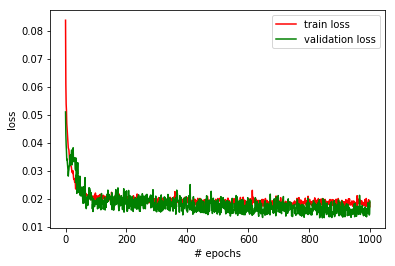

In [34]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='validation loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [27]:
model.load_weights('model-648.model')

In [28]:
results=model.predict(test_data)

In [29]:
print('Actual targets:',scaler_y.inverse_transform(test_target[:10]))
print('Predicted targets:',scaler_y.inverse_transform(results[:10]))

Actual targets: [[2520.]
 [1400.]
 [1400.]
 [1560.]
 [1400.]
 [1400.]
 [1450.]
 [2500.]
 [2184.]
 [3400.]]
Predicted targets: [[2531.406 ]
 [1373.3455]
 [1373.0333]
 [1373.1893]
 [1372.7561]
 [1373.292 ]
 [1373.5575]
 [2553.282 ]
 [2398.0164]
 [2545.0461]]


In [30]:
from sklearn.metrics import r2_score

print('r2_score:',r2_score(test_target,results))

r2_score: 0.8114421545358066
